In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df=pd.read_csv("data\synthetic_covid19_data.csv")
df.head()

,date,continent,location,total_cases,new_cases,total_deaths,new_deaths,total_tests,new_tests,positive_rate,...,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence
0,2021-11-19,Asia,India,6423388,2490,107051,323,60016385,7386,0.904377,...,69.259331,1241418161,67.394702,49.883751,8.649395,16.052063,44313.199955,20.827286,177.832655,16.296474
1,2021-09-12,North America,Russia,6550634,6980,481184,697,28666409,6862,0.525850,...,7.185287,114516392,694.409929,30.126823,8.957854,4.423022,8196.945011,20.478579,470.991420,8.579170
2,2020-04-20,Europe,Canada,4304572,9134,15116,325,80352550,40108,0.791575,...,14.823246,1152898402,784.464729,22.648063,9.336778,18.776372,52607.000057,11.924664,415.880908,14.989789
3,2022-10-16,Asia,Germany,2234489,7661,20045,624,89212990,91788,0.115291,...,70.007502,1342525124,403.467508,42.951109,5.321894,10.526520,23297.985037,4.591400,643.510444,18.084096
4,2021-05-15,Europe,USA,9958614,1724,419543,824,5364240,75023,0.927643,...,28.972334,744943966,182.869692,26.414731,19.321761,15.889173,56126.828895,5.431330,451.846790,5.971409


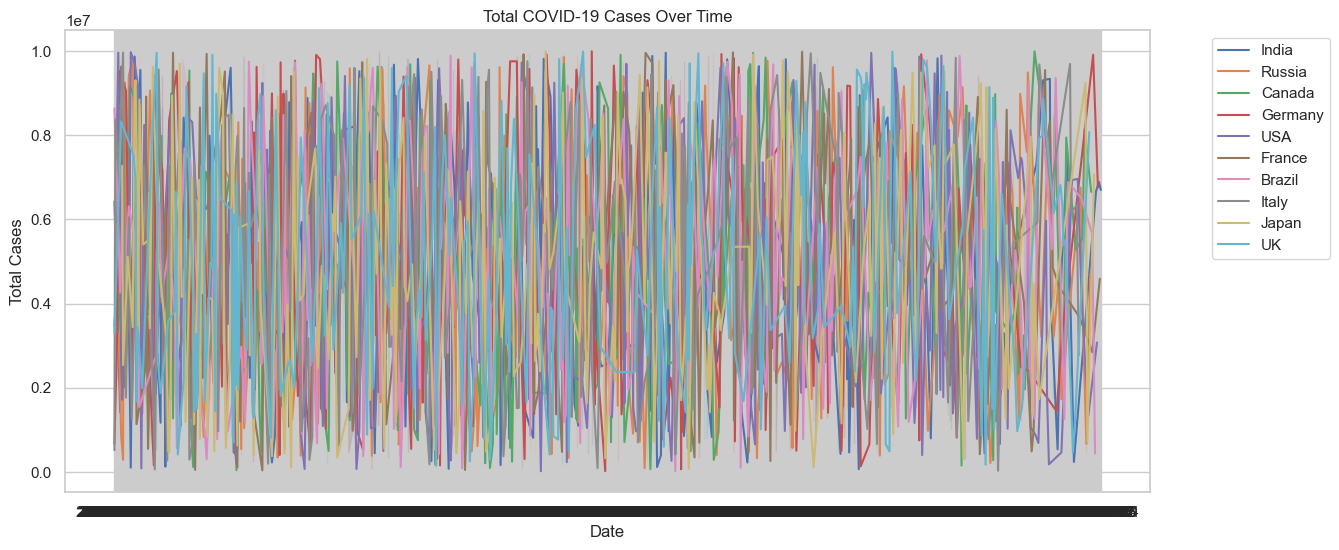

In [10]:
# Set a default style
sns.set(style="whitegrid")

# -------------------------
# 1️⃣ Total cases over time
# -------------------------
plt.figure(figsize=(14,6))
sns.lineplot(data=df, x='date', y='total_cases', hue='location')
plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

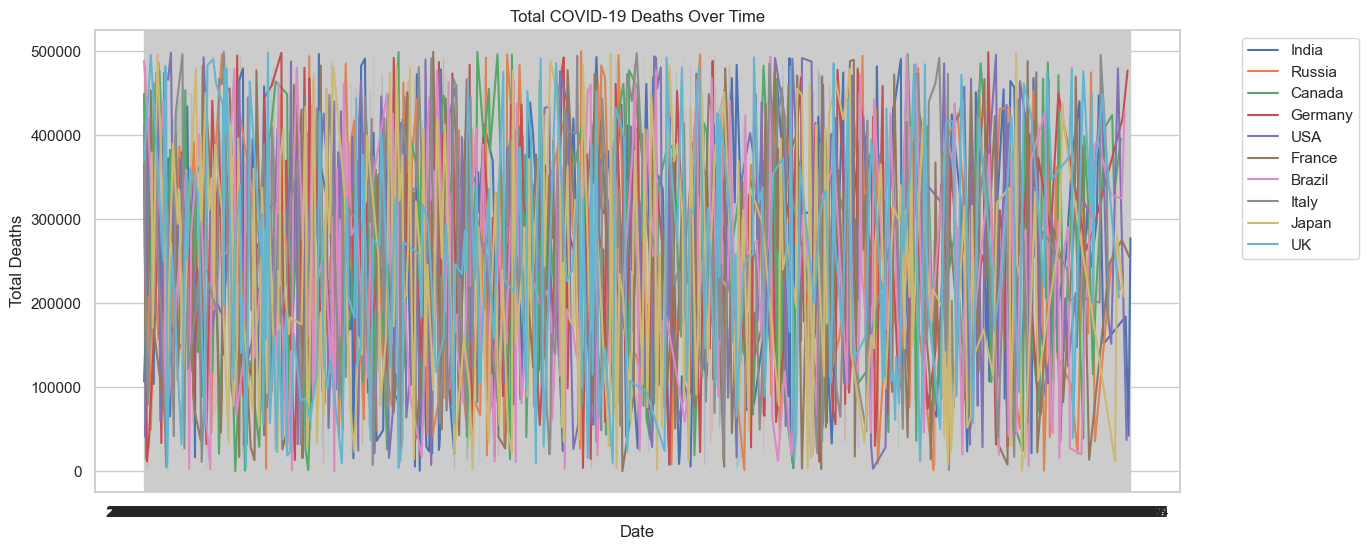

In [11]:
# -------------------------
# 2️⃣ Total deaths over time
# -------------------------
plt.figure(figsize=(14,6))
sns.lineplot(data=df, x='date', y='total_deaths', hue='location')
plt.title('Total COVID-19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

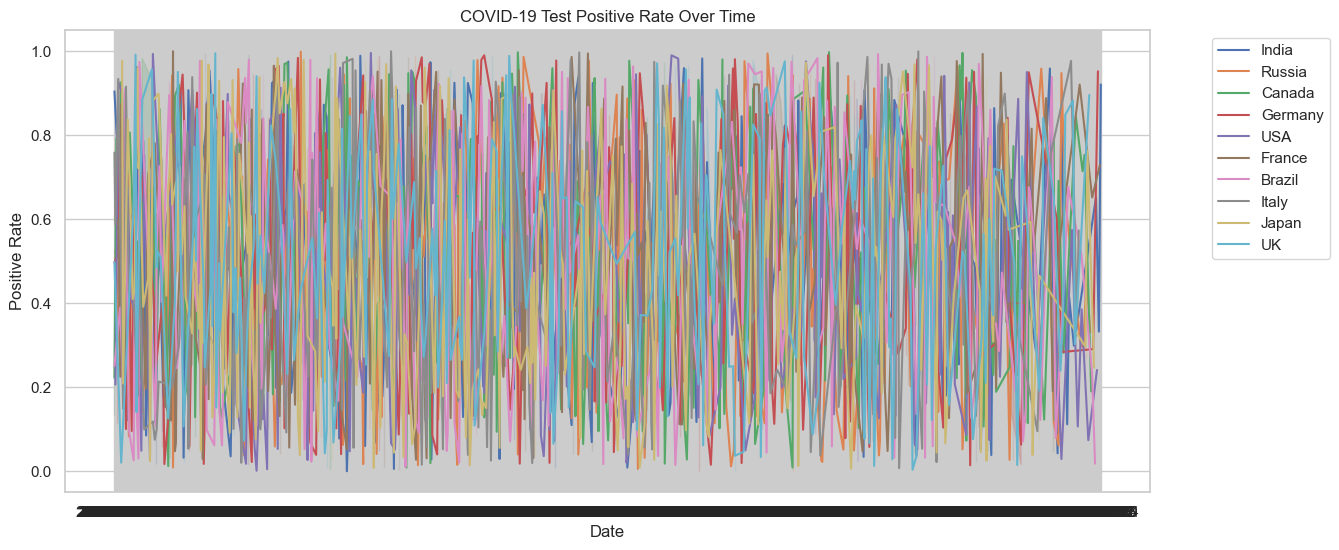

In [12]:
# -------------------------
# 3️⃣ Positive rate over time
# -------------------------
plt.figure(figsize=(14,6))
sns.lineplot(data=df, x='date', y='positive_rate', hue='location')
plt.title('COVID-19 Test Positive Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Positive Rate')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

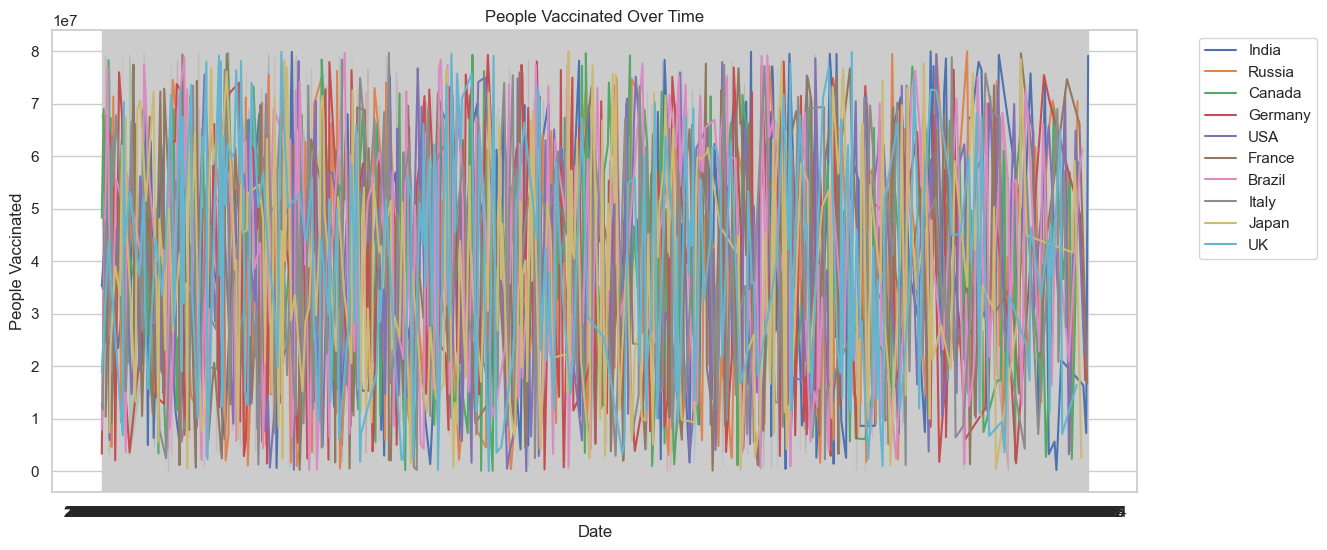

In [13]:
# -------------------------
# 4️⃣ Vaccination progress
# -------------------------
plt.figure(figsize=(14,6))
sns.lineplot(data=df, x='date', y='people_vaccinated', hue='location')
plt.title('People Vaccinated Over Time')
plt.xlabel('Date')
plt.ylabel('People Vaccinated')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


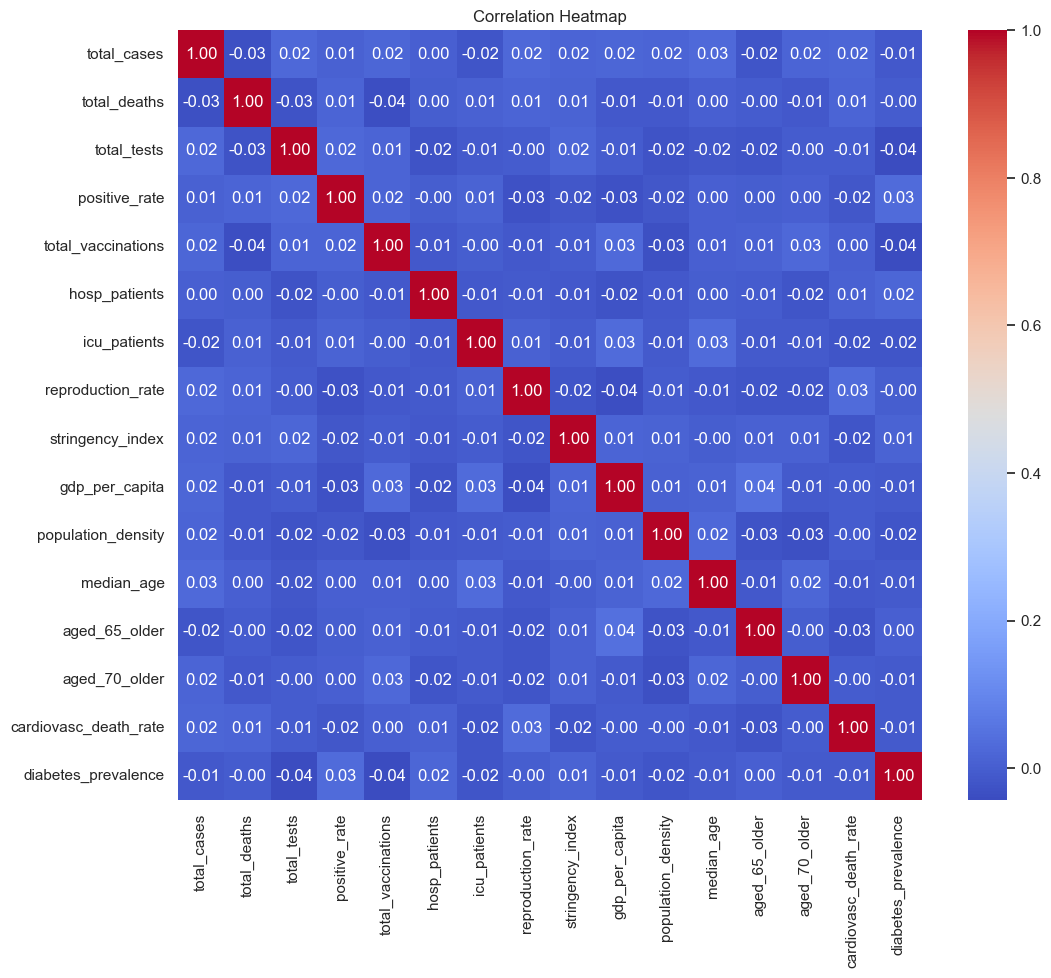

In [14]:
# -------------------------
# 5️⃣ Correlation heatmap
# -------------------------
# Selecting numeric columns
corr_cols = ['total_cases','total_deaths','total_tests','positive_rate','total_vaccinations',
             'hosp_patients','icu_patients','reproduction_rate','stringency_index','gdp_per_capita',
             'population_density','median_age','aged_65_older','aged_70_older','cardiovasc_death_rate','diabetes_prevalence']

corr = df[corr_cols].corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()


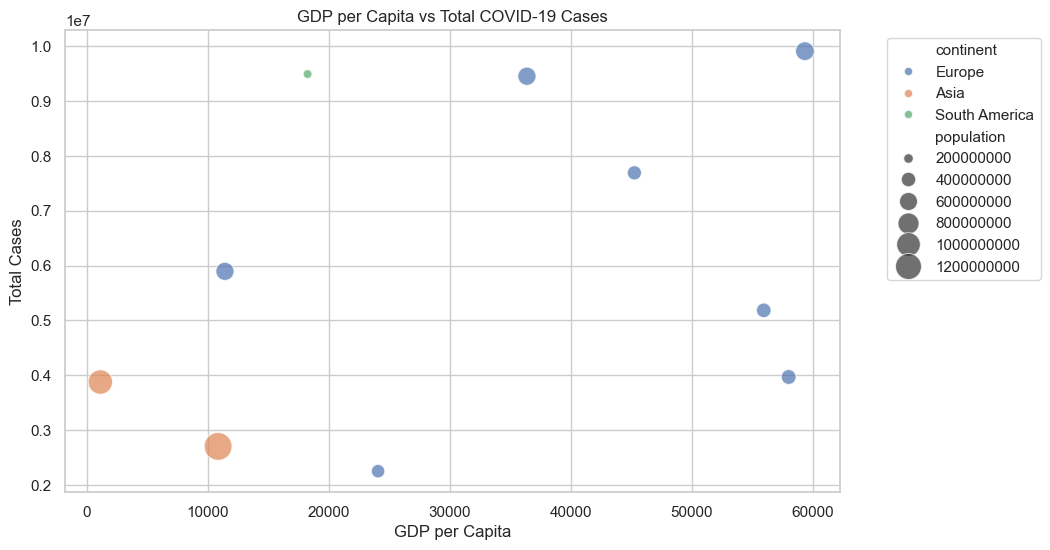

In [15]:
# -------------------------
# 6️⃣ Scatter plot: GDP vs Total Cases
# -------------------------
# Take latest date per location
latest_df = df.sort_values('date').groupby('location').tail(1)

plt.figure(figsize=(10,6))
sns.scatterplot(data=latest_df, x='gdp_per_capita', y='total_cases', size='population', hue='continent', alpha=0.7, sizes=(40, 400))
plt.title('GDP per Capita vs Total COVID-19 Cases')
plt.xlabel('GDP per Capita')
plt.ylabel('Total Cases')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()